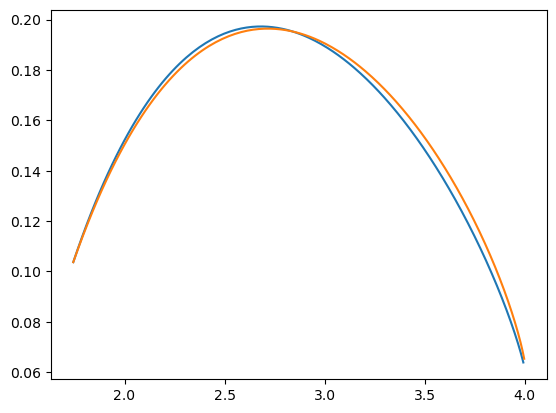

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import sys
sys.path.append('../src')
from config.dynamic import ODE, Toggle
from config.test0422 import TestSettings


func_name = 'toggle'
cfg = TestSettings[func_name]

x_num = cfg['common']['x_num']
y_num = cfg['common'].get('y_num', 1)
x_range = cfg['common']['x_range']

class MyToggle(ODE):
    '''
    Paper: https://www.nature.com/articles/35002131#Sec7
    Parameter: https://2013.igem.org/Team:Duke/Modeling/Kinetic_Model
    '''
    def __init__(self, x_range, params, dt) -> None:
        super().__init__(x_range, params, dt)
        
    def _equation(self, x, t) -> np.ndarray:
        dx = np.zeros_like(x)
        dx[0] = (-1.0910570837*x[0]*(x[1]**3 + 1.0018642561) + 4.3743651287)/(x[1]**3 + 1.0018642561)
        dx[1] = (-0.999992536*x[1]*(x[0]**3 + 0.9510599014) + 4.1233952239)/(x[0]**3 + 0.9510599014)
        return dx

np.random.seed(2)
x_gt = Toggle(
        x_range = list(x_range.values()),
        params = [4, 4, 3, 3],
        dt = cfg['dt'],
    ).solve((cfg['traj_points'] + 2) * cfg['dt'] * 50)
np.random.seed(2)
x_my = MyToggle(
        x_range = list(x_range.values()),
        params = cfg['params'],
        dt = cfg['dt'],
    ).solve((cfg['traj_points'] + 2) * cfg['dt'] * 50)
projection = '3d' if x_gt.shape[1] == 3 else None
ax = plt.axes(projection = projection)
ax.plot(*[t for t in x_gt.T])
ax.plot(*[t for t in x_my.T])
plt.show()